In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


Exploring the Contents: A Glimpse into the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [4]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


"Identifying Challenges: Exploring Issues within the Dataset."

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

ok!thats Great

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

"Data Imputation: Replacing Values in Selected Columns."

In [9]:
df['Sex'].replace({'M':'Male', 'F':'Female'}, inplace=True)

In [10]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [11]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [12]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

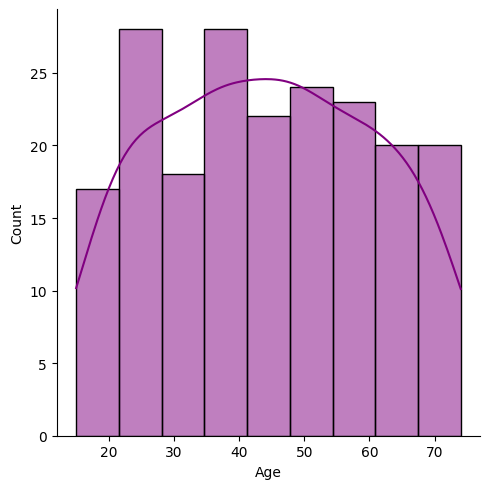

In [13]:
sns.displot(df['Age'], kde=True,color = 'purple')

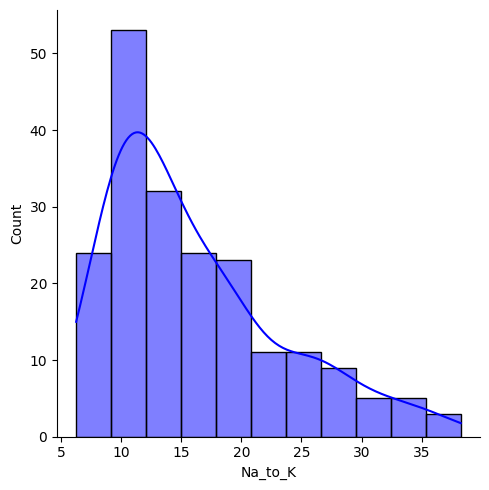

In [14]:
sns.displot(df['Na_to_K'], kde=True,color = 'blue')

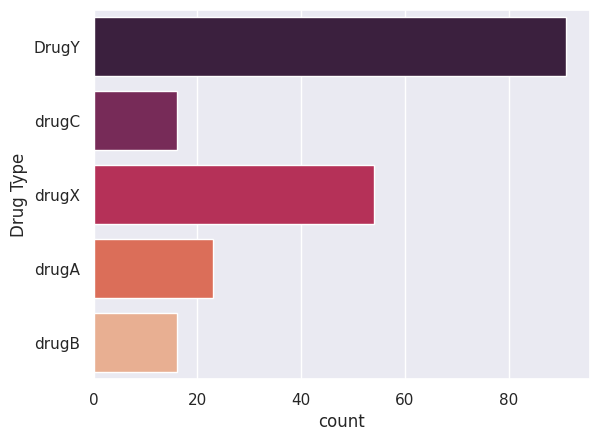

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(y='Drug',data=df, palette='rocket')
plt.ylabel('Drug Type')
plt.show()

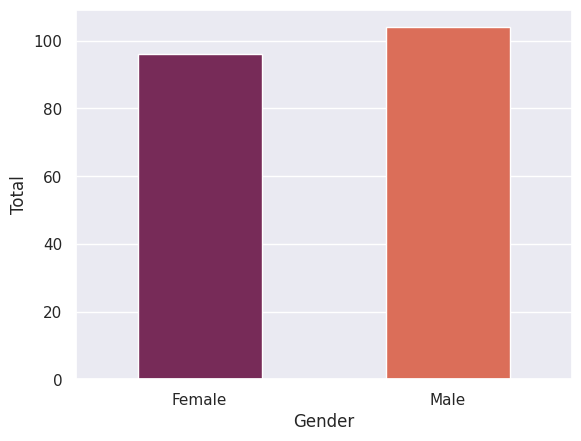

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Sex',data=df, palette='rocket',width=.5)
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

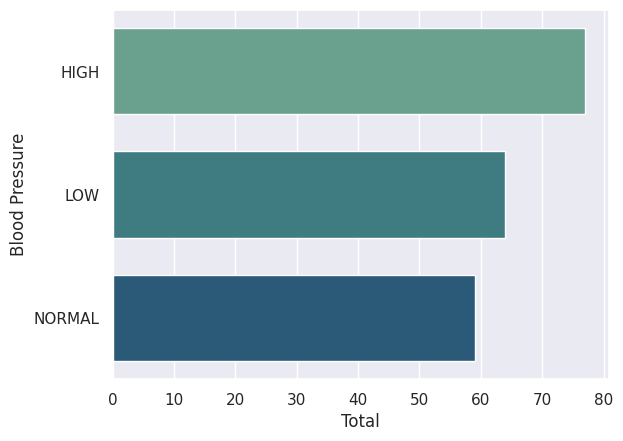

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(y='BP',data=df, palette='crest',width=.7)
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

Cholesterol Distribution

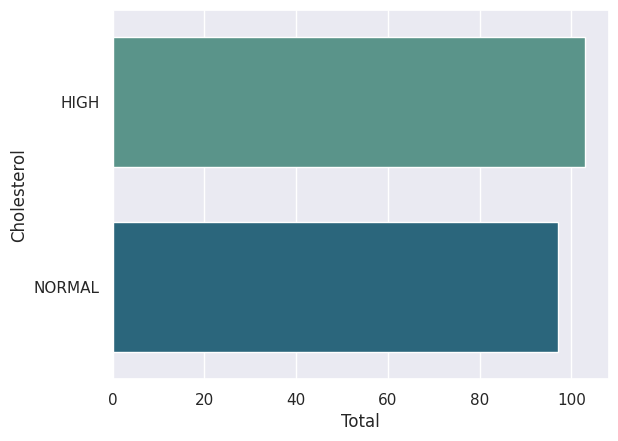

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(y='Cholesterol',data=df, palette='crest',width=.7)
plt.ylabel('Cholesterol')
plt.xlabel('Total')
plt.show()

Text(0, 0.5, 'Frequency')

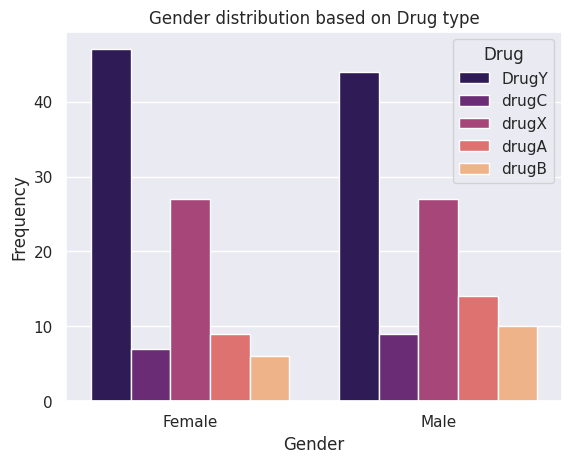

In [19]:
sns.countplot(x="Sex", hue="Drug", data=df, palette="magma")
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

In [20]:
age_bins = [0, 19, 29, 39, 49, 59, 69, 79]
category_bins = ['<20', '20', '30', '40','50', '60', '>70']
df['Age binned'] = pd.cut(df['Age'], bins=age_bins, labels=category_bins)
df.drop('Age',axis=1, inplace=True)

In [21]:
df.head(5)

,Sex,BP,Cholesterol,Na_to_K,Drug,Age binned
0,Female,HIGH,HIGH,25.355,DrugY,20
1,Male,LOW,HIGH,13.093,drugC,40
2,Male,LOW,HIGH,10.114,drugC,40
3,Female,NORMAL,HIGH,7.798,drugX,20
4,Female,LOW,HIGH,18.043,DrugY,60


6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into 4 categories:

Below 10.
10 - 20.
20 - 30.
Above 30.

In [22]:
Na_bins = [0, 9, 19, 29, 50]
category_Na_bins = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=Na_bins, labels=category_Na_bins)
df.drop('Na_to_K',axis=1, inplace=True)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [24]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [26]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(solver='liblinear', max_iter=5000)
y_pred = log_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(type(log_clf).__name__,'accuracy is:  {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))



              precision    recall  f1-score   support

       DrugY       0.82      0.93      0.87        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.60      0.75         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.91      0.87      0.88        40
weighted avg       0.92      0.90      0.90        40

[[14  0  1  0  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  3  0]
 [ 0  0  0  0 11]]
LogisticRegression accuracy is:  90.00%


In [28]:
from sklearn.svm import SVC
SVC_clf = SVC(kernel='linear', max_iter=150)
y_pred = SVC_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(type(SVC_clf).__name__,'accuracy is:  {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))



              precision    recall  f1-score   support

       DrugY       0.81      0.87      0.84        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       0.75      0.60      0.67         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.88        40
   macro avg       0.86      0.86      0.85        40
weighted avg       0.88      0.88      0.87        40

[[13  0  1  1  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  3  0]
 [ 0  0  0  0 11]]
SVC accuracy is:  87.50%


In [29]:
from sklearn.naive_bayes import CategoricalNB
NB_clf = CategoricalNB()
y_pred = NB_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(type(NB_clf).__name__,'accuracy is:  {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

       DrugY       0.80      0.80      0.80        15
       drugA       0.83      0.83      0.83         6
       drugB       0.75      1.00      0.86         3
       drugC       0.80      0.80      0.80         5
       drugX       1.00      0.91      0.95        11

    accuracy                           0.85        40
   macro avg       0.84      0.87      0.85        40
weighted avg       0.86      0.85      0.85        40

[[12  1  1  1  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 1  0  0  0 10]]
CategoricalNB accuracy is:  85.00%


In [30]:
from sklearn.naive_bayes import GaussianNB
Gaussian_clf = GaussianNB()
y_pred = Gaussian_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(type(Gaussian_clf).__name__,'accuracy is:  {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

       DrugY       0.93      0.87      0.90        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.80      0.89         5
       drugX       0.85      1.00      0.92        11

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.89        40
weighted avg       0.91      0.90      0.90        40

[[13  0  1  0  1]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0 11]]
GaussianNB accuracy is:  90.00%


In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_leaf_nodes=20)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(type(tree_clf).__name__,'accuracy is:  {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

       DrugY       0.93      0.87      0.90        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.93        40
   macro avg       0.90      0.94      0.91        40
weighted avg       0.93      0.93      0.93        40

[[13  0  1  1  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
DecisionTreeClassifier accuracy is:  92.50%


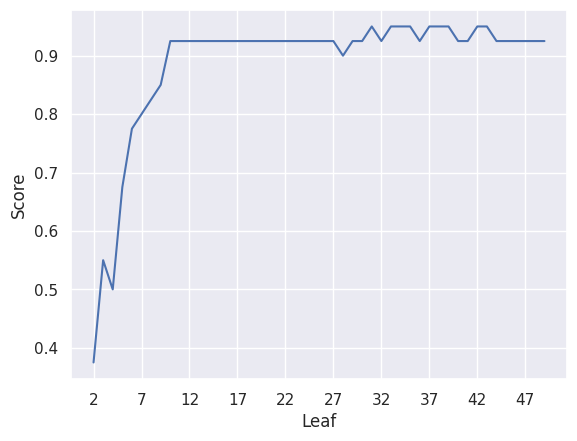

DT Acc Max 95.00%


In [32]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_leaf_nodes=30)
y_pred = forest_clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(type(forest_clf).__name__,'accuracy is:  {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

       DrugY       0.82      0.93      0.87        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.60      0.75         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.91      0.87      0.88        40
weighted avg       0.92      0.90      0.90        40

[[14  0  1  0  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  3  0]
 [ 0  0  0  0 11]]
RandomForestClassifier accuracy is:  90.00%
